In [1]:
import astropy.units as u

from altaipony.lcio import from_mast
from altaipony.altai import find_iterative_median
from altaipony.flarelc import FlareLightCurve


from lightkurve import search_targetpixelfile

import matplotlib.pyplot as plt
%matplotlib inline

import copy


from scipy.interpolate import UnivariateSpline

import os
import pandas as pd
import numpy as np

from funcs.funcs import read_custom_aperture_lc
from funcs.custom_detrending import custom_detrending

from altaipony.fakeflares import aflare

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
clcs = ! ls /home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/*fits
clcs = [x.split("/")[-1] for x in clcs]

def get_customlc(TIC, c, clcs):
    for p in clcs:
        if (str(TIC) in p.split("-")[2]) & (c == int(p.split("-")[1][1:])):
            print(p)
            pac = p
    return pac

In [3]:
CWD = "/".join(os.getcwd().split("/")[:-1])
respath = f"{CWD}/flare_tables/2019_11_18_TESSUCDs_flares.csv"
df = pd.read_csv(respath)
targetswflare = df.TIC.unique().shape[0]
LCswflares = df.groupby(by=["TIC","Campaign"]).count().sort_values(by="ampl_rec").shape[0]
candidates = df.shape[0]
amplmax = df.ampl_rec.max()


In [4]:
df[df.Campaign==6].groupby("TIC").count()
TIC = 142052876

#df.groupby("TIC").Campaign.count().sort_values(ascending=False)[:10]
df[df.TIC==TIC].Campaign.unique()
#df.sort_values(by="ed_rec", ascending=False).head()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13])

In [5]:
c=1
plt.figure(figsize=(16,5))

path = get_customlc(TIC, c, clcs)

path = f"{CWD}/custom_aperture/" + path

flc = read_custom_aperture_lc(path)
flck = copy.deepcopy(flc)
#plt.plot(flc.time, flc.flux, c= "k")

flcd = custom_detrending(flc)
flcd = flcd.find_flares()
#plt.xlim(1394.5,1395.5)
#plt.xlim(1660,1670)
#plt.ylim(-1e14,1e14)
flcd.flares.sort_values(by="ed_rec",ascending=False)


1ca_tess2019082014114-s0001-0000000142052876-0000-s_lc.fits
Found peak in periodogram at  1.785461473329574 1 / d
SNR at  1.5068986902024757
Found peak in periodogram at  1.7930988605574345 1 / d
SNR at  1.818721271759963
Found peak in periodogram at  1.6700210762788557 1 / d
SNR at  0.9046970761888059
Window lengths:  [75, 75, 955]


/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: ResourceWarning: unclosed file <_io.FileIO name='/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/custom_aperture/1ca_tess2019082014114-s0001-0000000142052876-0000-s_lc.fits' mode='rb' closefd=True>
  


Do last SavGol round.


Found 4 candidate(s) in the (0,9223) gap.
Found 1 candidate(s) in the (9223,15240) gap.
Found 3 candidate(s) in the (15240,18104) gap.
/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/tessenv/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,ampl_rec,cstart,cstop,ed_rec,ed_rec_err,istart,istop,total_n_valid_data_points,tstart,tstop
6,0.450151,90441,90472,200.162389,0.708878,18025,18056,18104.0,1353.068335,1353.111390
2,0.094941,77718,77738,55.006854,0.820335,7009,7028,18104.0,1335.397790,1335.425567
1,0.022383,76823,76831,13.084491,0.423802,6163,6171,18104.0,1334.154755,1334.165866
0,0.015725,74161,74165,6.114157,0.455839,3579,3583,18104.0,1330.457578,1330.463133
4,0.031122,81303,81306,5.833163,0.263789,9738,9741,18104.0,1340.376871,1340.381038
3,0.010245,79157,79161,4.742440,0.534810,8437,8441,18104.0,1337.396368,1337.401924
7,0.016283,90482,90485,4.389117,0.403634,18066,18069,18104.0,1353.125279,1353.129445
5,0.015639,88363,88366,4.246444,0.294500,15977,15980,18104.0,1350.182278,1350.186445


<Figure size 1152x360 with 0 Axes>

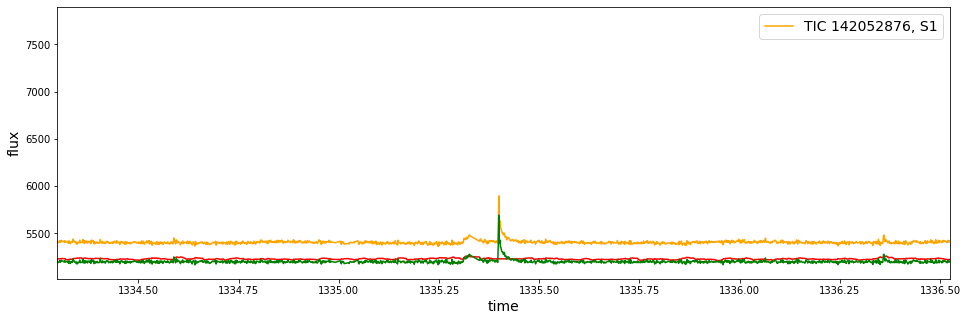

In [6]:
plt.figure(figsize=(16,5))
g = 14

plt.plot(flck.time, flck.flux+200, c="orange", label=f"TIC {flc.targetid}, S{flc.campaign}");#flc.time, 
plt.plot(flcd.time,flcd.it_med+3*flcd.detrended_flux_err, c="r");
plt.plot(flcd.time,flcd.detrended_flux, c="g");
f = flcd.flares.iloc[2]
plt.xlim(f.tstart-1.1,f.tstop+1.1);
#plt.xlim(f.cstart-1000,f.cstop+1000);
#plt.ylim(1600,2000)
#plt.xlim(298200,298600)
#plt.xlim(1641.81,1644)
plt.xlabel("time",fontsize=14)
plt.ylabel("flux",fontsize=14)
plt.legend(fontsize=14)
#plt.savefig(f"TIC{flc.targetid}_s{flc.campaign}_multiperiod.png",dpi=300)

In [ ]:
CWD = "/".join(os.getcwd().split("/")[:-1])
respath = f"{CWD}/flare_tables/2019_11_18_TESSUCDs_flares.csv"
df = pd.read_csv(respath)
f = df
f["x"] =f.tstop-f.tstart
f = f.sort_values(by="x")
x = (f.tstop-f.tstart).values
x = f.ed_rec.values
y = f.ampl_rec.values
plt.scatter(x, y)
plt.scatter(flcd.flares.ed_rec, flcd.flares.ampl_rec)
#plt.scatter(flcd.flares.tstop-flcd.flares.tstart, flcd.flares.ed_rec)
plt.xscale("log")
plt.yscale("log")
#np.polyfit(f.tstop-f.tstart, f.ed_rec,1)
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * np.power(x , b)
popt, pcov = curve_fit(func, x, y)
x=np.array([5e-4,5e-3,5e-2,5e-1])
plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
plt.legend()
func(0.4, *popt),func(0.6, *popt)

In [ ]:
f = flcd.flares.loc[[0,1,5],:]
f["x"] =f.tstop-f.tstart
f = f.sort_values(by="x")
x = (f.tstop-f.tstart).values
y = f.ampl_rec.values
plt.scatter(x, y)
plt.xscale("log")
plt.yscale("log")
#np.polyfit(f.tstop-f.tstart, f.ed_rec,1)
from scipy.optimize import curve_fit
def func(x, a):
    return a * np.power(x , .965)#b=1.465 for edrec, b=0.965 for ampl_rec
popt, pcov = curve_fit(func, x, y)
x=np.array([5e-4,5e-3,5e-2,5e-1])
plt.plot(x, func(x, *popt), 'r-',
         label='fit: a=%5.3f' % tuple(popt))
plt.legend()
func(0.4, *popt),func(0.6, *popt)
#ED = (7981.423328873443, 14456.196424545316) s, amplitude=(1.856542468781827, 2.7455727338847487)

In [ ]:
plt.figure(figsize=(16,5))
g = 14

plt.plot(flck.time, flck.flux, c="orange");#flc.time, 
#plt.plot(flcd.time,flcd.it_med+3*flcd.detrended_flux_err, c="r");
#plt.plot(flcd.time,flcd.detrended_flux, c="g");
f = flcd.flares.iloc[3]
plt.xlim(f.tstart-.5,f.tstop+.5);
#plt.ylim(1.36e5,1.4e5)
#plt.xlim(298200,298600)
#plt.xlim(1641.81,1644)
for a in np.linspace(.9,1.7,10):
    for d in np.linspace(.4,.6,10):
        plt.plot(flcd.time,flcd.it_med*aflare(flcd.time, 1641.835, d/6, a,) + flcd.it_med, c="grey", alpha=.05)
plt.title("ampl=1.9-2.7, dur=.4-.6 d")
plt.savefig("/home/ekaterina/Documents/001_Science/TESS_UCDs/TESS_UCD_flares/weird_feature/flarefit1.png", dpi=300)

In [ ]:
tpf = search_targetpixelfile("TIC" + str(flcd.targetid), sector=c).download()

In [ ]:
tpf.interact()

In [ ]:
markers =  ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')

358108509 1 last flare suffers from de-trending being weird at the end of the LC
340703996 2 first flare could also be an undetrended wiggle in the LC